In [122]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [123]:
from matplotlib.font_manager import FontProperties

# Specify your font
regular = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Regular.ttf")  # Update the path to where the font is installed on your system
light = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Light.ttf")  # Update the path to where the font is installed on your system
bold = FontProperties(fname="C:\\Users\\George\\Documents\\Football Analytics\\Kanit-Bold.ttf")  # Update the path to where the font is installed on your system

In [124]:
league_name = 'Premier League'
league_name_dash = league_name.replace(' ', '-')
league_id = 9
year_range = '2023-2024'

In [125]:
url = f'https://fbref.com/en/comps/{league_id}/passing/{league_name_dash}-Stats#all_stats_passing'
response = requests.get(url).text.replace('<!--', '').replace('-->', '')
df = pd.read_html(response, header=1)[2]

In [126]:
df = df[df['Pos'].str.contains('MF')].reset_index(drop=True)

In [127]:
df['90s'] = df['90s'].astype(float)
df['PrgP'] = df['PrgP'].astype(float)
df['Cmp%'] = df['Cmp%'].astype(float)
df['PrgP per 90'] = df['PrgP'] / df['90s']

In [128]:
df = df[['Pos','Player','90s','Cmp%','PrgP','PrgP per 90']]

In [129]:
df = df[df['90s'] > 15].reset_index(drop=True)

In [130]:
todays_date = pd.to_datetime('today').strftime('%d %B %Y')

In [131]:
df['PrgP per 90'].max()

11.533742331288343

In [132]:
pd.set_option('display.max_rows', None)
df = df.sort_values(by='Pos').reset_index(drop=True)

In [133]:
df = df[~df['Pos'].str.startswith('DF')]
df = df[~df['Pos'].str.startswith('FW')].reset_index(drop=True)

In [134]:
df.loc[~df['Player'].str.contains('Armstrong'), 'Player'] = df.loc[~df['Player'].str.contains('Armstrong'), 'Player'].str.split().apply(lambda x: x[-1])

In [135]:
df.loc[df['Player'] == 'Gabriel', 'Player'] = 'Sara'
df.loc[df['Player'] == 'Bidace', 'Player'] = 'Philogene'
df.loc[df['Player'] == 'Allister', 'Player'] = 'Mac Allister'

In [136]:
df.drop_duplicates(subset='Player', keep='first', inplace=True)
df = df[df['Player'] != 'Paterson'].reset_index(drop=True)
df = df[df['Player'] != 'Odobert'].reset_index(drop=True)
df = df[df['Player'] != 'Kluivert'].reset_index(drop=True)
df = df[df['Player'] != 'Havertz'].reset_index(drop=True)
df = df[df['Player'] != 'Álvarez'].reset_index(drop=True)
df = df[df['Player'] != 'Bailey'].reset_index(drop=True)
df = df[df['Player'] != 'McNeil'].reset_index(drop=True)
df = df[df['Player'] != 'Mcatee'].reset_index(drop=True)
df = df[df['Player'] != 'Harrison'].reset_index(drop=True)

In [137]:
df_names = df.copy()
df_drop = df.copy()
upper_cmp = df['Cmp%'].quantile(0.75)
lower_cmp = df['Cmp%'].quantile(0.25)
upper_prgp = df['PrgP per 90'].quantile(0.75)
lower_prgp = df['PrgP per 90'].quantile(0.25)
for i in range(len(df)):
    if df['Cmp%'][i] > upper_cmp or df['Cmp%'][i] < lower_cmp:
        df_drop = df_drop.drop(i)
    elif df['PrgP per 90'][i] > upper_prgp or df['PrgP per 90'][i] < lower_prgp:
        df_drop = df_drop.drop(i)
    else:
        df_names = df_names.drop(i)

df_names.reset_index(drop=True, inplace=True)
df_drop.reset_index(drop=True, inplace=True)

In [138]:
df['Cmp%'].quantile(.75)

86.225

In [139]:
colors = []
prog_mean = df['PrgP per 90'].mean()
pass_mean = df['Cmp%'].mean()
for i in range(len(df_names)):
    if df_names['PrgP per 90'][i] > prog_mean and df_names['Cmp%'][i] > pass_mean:
        colors.append('green')
    elif df_names['PrgP per 90'][i] > prog_mean and df_names['Cmp%'][i] < pass_mean:
        colors.append('blue')
    elif df_names['PrgP per 90'][i] < prog_mean and df_names['Cmp%'][i] > pass_mean:
        colors.append('blue')
    else:
        colors.append('red')

df_names['colors'] = colors

In [141]:
df

,Pos,Player,90s,Cmp%,PrgP,PrgP per 90
0,MF,Palhinha,30.0,82.4,97.0,3.233333
1,MF,Luiz,33.3,85.7,168.0,5.045045
2,MF,Lemina,33.0,85.8,76.0,2.303030
3,MF,Ward-Prowse,33.3,82.9,144.0,4.324324
4,MF,Mac Allister,28.9,86.6,209.0,7.231834
5,MF,Yates,22.1,79.6,73.0,3.303167
6,MF,Longstaff,30.5,79.9,145.0,4.754098
7,MF,Maddison,23.7,80.7,224.0,9.451477
8,MF,Sarr,23.0,87.4,150.0,6.521739
9,MF,Mangala,17.4,88.2,45.0,2.586207


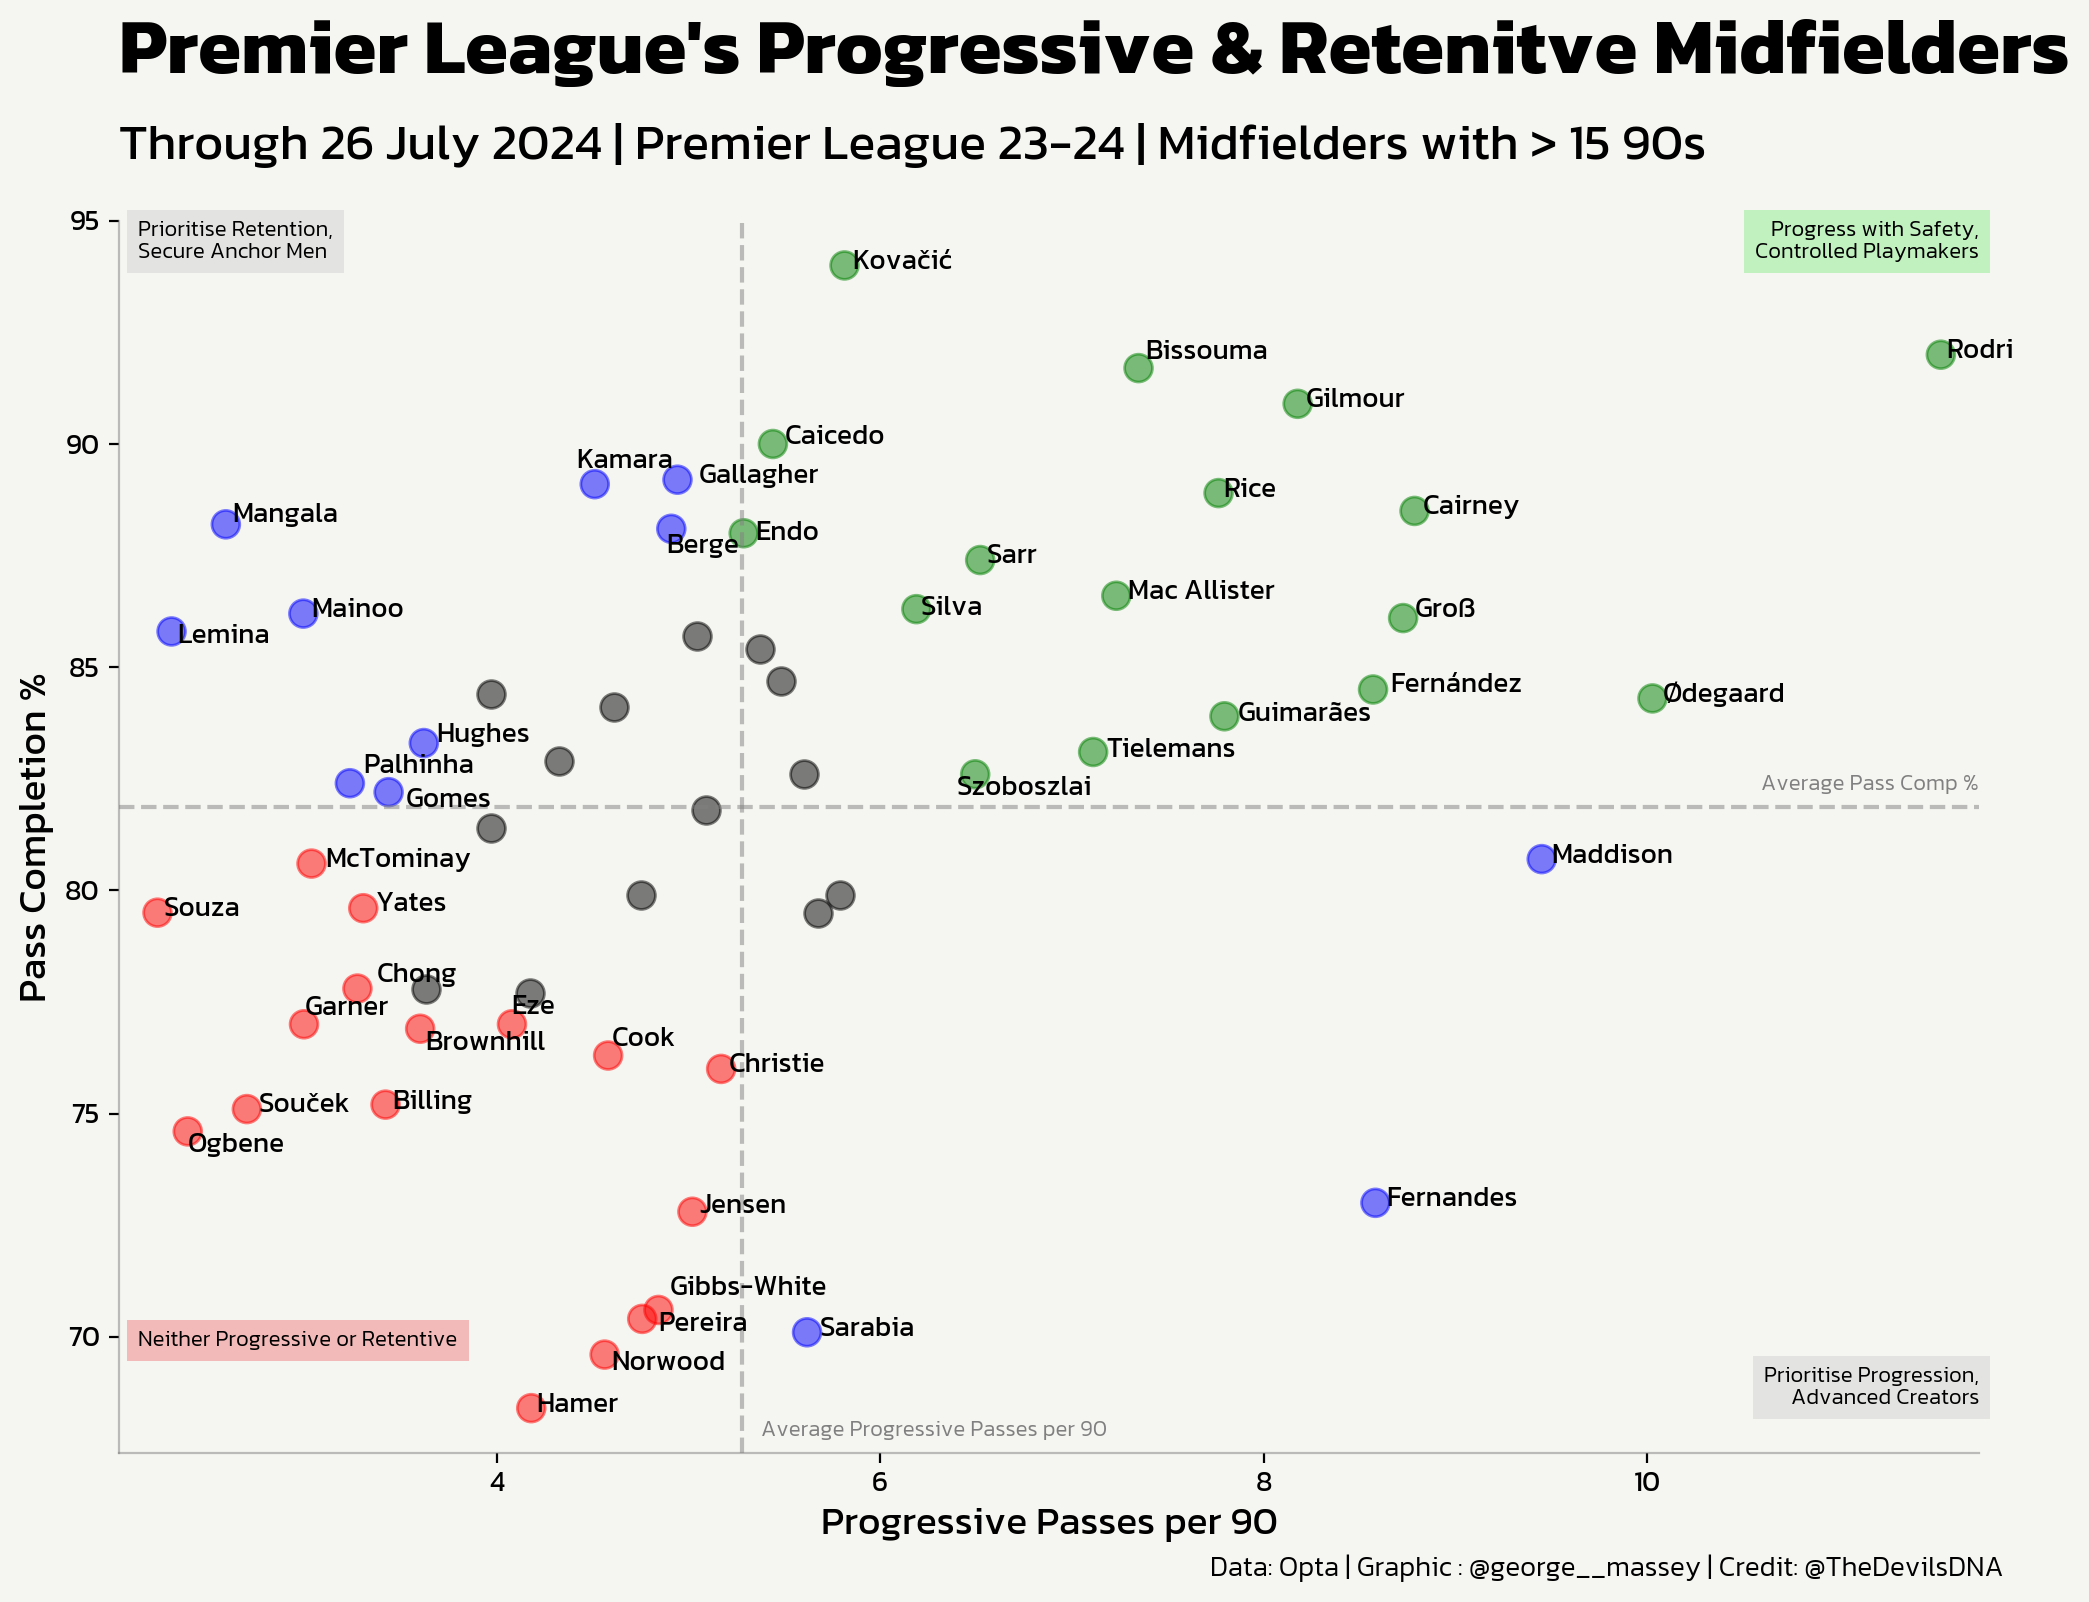

In [140]:
from PIL import Image
import adjustText

plt.figure(figsize=(12, 8), dpi=200, facecolor='#F5F6F1')  # Set the facecolor to #141514

plt.scatter(df_drop['PrgP per 90'], df_drop['Cmp%'], color='black', s=100, alpha=0.5)
plt.scatter(df_names['PrgP per 90'], df_names['Cmp%'], color=df_names['colors'], s=100, alpha=0.5)

texts = [plt.text(x, y, text, color='black', fontsize=10, ha='left', va='center', fontproperties = regular) for x, y, text in zip(df_names['PrgP per 90'], df_names['Cmp%'], df_names['Player'])]
adjustText.adjust_text(texts,
                       x=df_names['PrgP per 90'],
                       y=df_names['Cmp%'],
                       autoalign='xy',
                       only_move={'points':'y', 'text':'xy', 'objects':'xy'},
                       #arrowprops=dict(arrowstyle="->", color='black'),
                       expand_points=(1.2, 1.5),
                       expand_text=(1.1, 1.2),
                       force_points=0.3,
                       #force_text=0.4,
                       force_objects=(0.1, 0.1),
                       lim=1000,
                       precision=0.1
                       )
# Add labels and title
plt.ylabel('Pass Completion %', fontproperties = regular, size = 14)  # Set the xlabel color to white
plt.xlabel('Progressive Passes per 90', fontproperties = regular, size = 14)  # Set the ylabel color to white

plt.xlim(df['PrgP per 90'].min()-0.2, df['PrgP per 90'].max()+0.2)
plt.ylim(df['Cmp%'].min()-1, df['Cmp%'].max()+1)

# Draw a line from the y-axis at the average value
plt.axvline(df['PrgP per 90'].mean(), color='grey', linestyle='--', alpha=0.5)
plt.axhline(df['Cmp%'].mean(), color='grey', linestyle='--', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')
plt.gca().spines['left'].set_alpha(0.5)
plt.gca().spines['bottom'].set_alpha(0.5)

xlim = plt.xlim()
ylim = plt.ylim()

plt.text(xlim[1], df['Cmp%'].mean()+0.5, "Average Pass Comp %", color='grey', fontsize=8, ha='right', va='center', fontproperties = light)
plt.text(df['PrgP per 90'].mean()+0.1, ylim[0]+0.5, "Average Progressive Passes per 90", color='grey', fontsize=8, ha='left', va='center', fontproperties = light)

# Top Left
plt.text(xlim[0]+0.1, ylim[1], "Prioritise Retention,\nSecure Anchor Men", 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='left', va='top', fontsize=8, wrap=True, fontproperties = light)
# Top Right
plt.text(xlim[1], ylim[1], "Progress with Safety,\nControlled Playmakers", 
         bbox=dict(facecolor='lightgreen', alpha=0.5, edgecolor='none'),
         ha='right', va='top', fontsize=8, wrap=True, fontproperties = light)
# Bottom Left
plt.text(xlim[0]+0.1, ylim[0]+2.3, "Neither Progressive or Retentive", 
         bbox=dict(facecolor='lightcoral', alpha=0.5, edgecolor='none'),
         ha='left', va='bottom', fontsize=8, wrap=True, fontproperties = light)
# Bottom Right
plt.text(xlim[1], ylim[0]+1, "Prioritise Progression,\nAdvanced Creators", 
         bbox=dict(facecolor='lightgray', alpha=0.5, edgecolor='none'),
         ha='right', va='bottom', fontsize=8, wrap=True, fontproperties = light)

plt.text(0,1.12, f"{league_name}'s Progressive & Retenitve Midfielders", ha = 'left',fontsize=28, transform=plt.gca().transAxes, fontproperties=bold)
plt.text(0,1.05, f"Through {todays_date} | {league_name} 23-24 | Midfielders with > 15 90s", ha = 'left',fontsize=18, transform=plt.gca().transAxes, fontproperties=regular)
plt.text(0.8, -0.1, "Data: Opta | Graphic : @george__massey | Credit: @TheDevilsDNA", fontsize=10, ha = 'center',transform=plt.gca().transAxes, fontproperties=light)

# Set the ticks color to white
plt.xticks(fontproperties = regular)
plt.yticks(fontproperties = regular)

# Set the plot background color to #141514
plt.gca().set_facecolor('#F5F6F1')
# Add text box in each quadrant

plt.savefig(
    f"C:/Users/George/Documents/Football Analytics/Visuals/{league_name} PrgP v Pass Cmp {todays_date}.png",
    dpi=200,
    bbox_inches="tight"
)

plt.show()